In [31]:
# Langkah 1: Instalasi library yang dibutuhkan
!pip install -q langchain_community replicate pandas matplotlib seaborn

#---------------------------------------------------------------------

In [32]:
# Langkah 2: Impor library dan setup API Key
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import userdata
from langchain_community.llms import Replicate

In [33]:
# Pastikan Anda telah menyimpan API token Anda di Colab Secrets dengan nama 'api_token'
try:
    api_token = userdata.get('api_token')
    os.environ["REPLICATE_API_TOKEN"] = api_token
except Exception as e:
    print("Pastikan Anda sudah mengatur 'api_token' di Colab Secrets (klik ikon kunci di sidebar kiri).")
    print(e)

#---------------------------------------------------------------------

In [34]:
# Mengasumsikan file 'reviews.csv' sudah ada
print("Membaca data dari reviews.csv...")
df = pd.read_csv('reviews.csv')

# Menampilkan seluruh isi DataFrame
print("Menampilkan semua data yang berhasil dimuat:")
print(df)

Membaca data dari reviews.csv...
Menampilkan semua data yang berhasil dimuat:
                                          review_text
0   Oh dear Shingeki no Kyojin, where do I even be...
1   Attack on Titan is a particularly unique case ...
2   So what on earth? What have I done? How am I n...
3   There’s a current trend that favors dark and e...
4   Let's get straight to it! Shingeki no Kyojin i...
5   This anime made my mouth open wide for longer ...
6   It's nice to have an anime this popular that i...
7   The hype of 2013 leading to an ending that clo...
8   Shingeki no Kyojin is an amazingly written sto...
9   Shingeki no Kyojin, the anime that has brought...
10  The fact that so many bloggers still name Shin...
11  Well, I'll admit that it's been a while since ...
12  Animation? Great quality. Premise? Interesting...
13  So, Shingeki no Kyojin was like the most hyped...
14  an overrated, snoozefest at best. Many of my f...
15  This show is honestly the most overrated garba...
16  

In [35]:
#Langkah 4: Setup Model LLM dan Fungsi Analisis Sentimen
# Inisialisasi model dari Replicate
model_name = "ibm-granite/granite-3.2-8b-instruct"
replicate_llm = Replicate(
    model=model_name,
    replicate_api_token=api_token,
    model_kwargs={"max_length": 512} # Mengatur parameter model
)

def analyze_sentiment(review_text):
    """
    Fungsi untuk menganalisis sentimen dari satu teks ulasan.
    Mengembalikan 'Positive', 'Negative', atau 'Mixed'.
    """
    prompt = f"""
    Classify the following review as Positive, Negative, or Mixed.
    Only return one word for the classification.

    Review: "{review_text}"
    Classification:
    """
    try:
        response = replicate_llm.invoke(prompt)
        # Membersihkan respons untuk mendapatkan label yang bersih
        cleaned_response = response.strip().capitalize()
        if "Positive" in cleaned_response:
            return "Positive"
        elif "Negative" in cleaned_response:
            return "Negative"
        elif "Mixed" in cleaned_response:
            return "Mixed"
        else:
            return "Unknown" # Fallback jika respons tidak terduga
    except Exception as e:
        print(f"Error analyzing review: {e}")
        return "Error"

In [36]:
# Langkah 5: Melakukan Analisis Sentimen pada Setiap Ulasan
print("Memulai analisis sentimen untuk setiap ulasan...")
# Membuat kolom baru 'sentiment' dengan menerapkan fungsi analisis
# Tqdm digunakan untuk menampilkan progress bar (opsional, tapi membantu)
from tqdm.auto import tqdm
tqdm.pandas()
df['sentiment'] = df['review_text'].progress_apply(analyze_sentiment)

print("\nAnalisis sentimen selesai. Hasilnya:")
print(df)
print("\n" + "="*40 + "\n")


Memulai analisis sentimen untuk setiap ulasan...


  0%|          | 0/21 [00:00<?, ?it/s]


Analisis sentimen selesai. Hasilnya:
                                          review_text sentiment
0   Oh dear Shingeki no Kyojin, where do I even be...  Positive
1   Attack on Titan is a particularly unique case ...     Mixed
2   So what on earth? What have I done? How am I n...     Mixed
3   There’s a current trend that favors dark and e...  Positive
4   Let's get straight to it! Shingeki no Kyojin i...  Positive
5   This anime made my mouth open wide for longer ...  Positive
6   It's nice to have an anime this popular that i...     Mixed
7   The hype of 2013 leading to an ending that clo...     Mixed
8   Shingeki no Kyojin is an amazingly written sto...  Positive
9   Shingeki no Kyojin, the anime that has brought...  Positive
10  The fact that so many bloggers still name Shin...  Negative
11  Well, I'll admit that it's been a while since ...  Negative
12  Animation? Great quality. Premise? Interesting...  Negative
13  So, Shingeki no Kyojin was like the most hyped...  Negative
14

In [39]:
nama_file_hasil = 'hasil_analisis_sentimen.csv'
df.to_csv(nama_file_hasil, index=False)

print(f"\n✅ Data hasil analisis telah berhasil disimpan ke file '{nama_file_hasil}'")



✅ Data hasil analisis telah berhasil disimpan ke file 'hasil_analisis_sentimen.csv'


Membuat visualisasi hasil analisis sentimen...


/tmp/ipython-input-3481982626.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


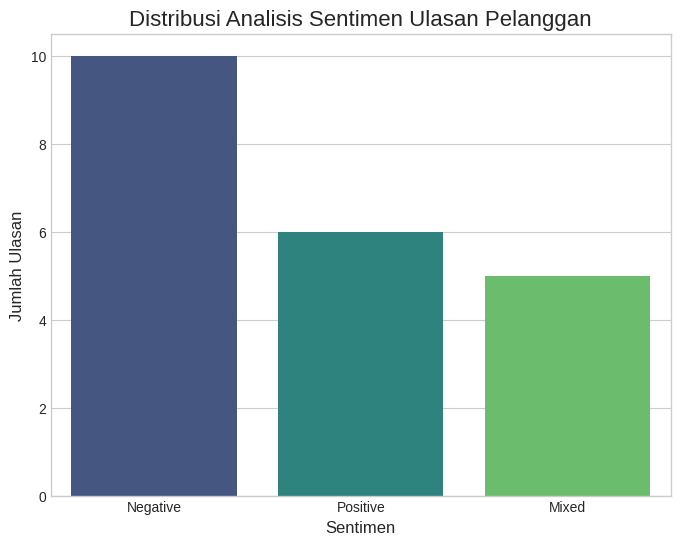

In [38]:
# Langkah 6: Visualisasi Hasil Analisis Sentimen
print("Membuat visualisasi hasil analisis sentimen...")

# Menghitung jumlah setiap kategori sentimen
sentiment_counts = df['sentiment'].value_counts()

# Mengatur gaya plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 6))

# Membuat bar plot
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Menambahkan judul dan label
plt.title('Distribusi Analisis Sentimen Ulasan Pelanggan', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.xticks(rotation=0) # Agar label x-axis tidak miring

# Menampilkan plot
plt.show()
